## Set ups
### Pacakges
- `jupyter`, `numpy`, `scipy`, `matplotlib`, `ipython`



## Plotting a Discrete-Time Sinusoidal Signal

Generate and visualize a **`discrete-time sinusoidal signal`** that is derived from the following **`continuous-time`** signal:

$$
x(t) = \sin(2\pi f t)
$$


where:

- $ f = 220 $ Hz (**`sampling frequency`**
- $ f_s = 8000 $ samples/second (**`sampling rate`**)

**What is the fundamental period of x(t)?**
  - **Ans**: $T_0 =  1 / 220 $
    - **Proof**: By definition , $T_0 = \frac{2 \pi}{\omega_0}$ and we know that $\omega_0 = 2 \pi f$. Rarrange the expression, then we can obtain the expression in terms of $T_0$


**What the discrete-time signal version of your sinusoidal signal given ?**
- **Ans**: discrete summation of x(input), where input is time step at i / sampling frequency
$$
x[n] =  \sum^{\infty}_{i = 0}x(\frac{i}{8000})                                 
$$



**Plot the first $100$ samples (starting from $n=0$) of $x[n]$ using `matplotlib`, labeling the axes appropriately**


Text(0, 0.5, 'x[n]')

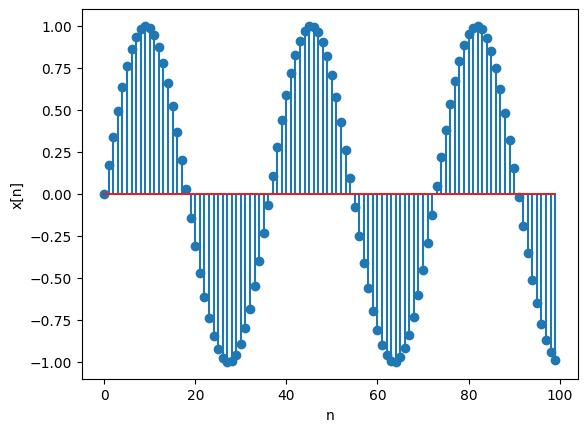

In [39]:
import numpy as np
import matplotlib.pyplot as plt

steps = np.arange(0, 100) / 8000
x_t =  lambda t: np.sin(2 * np.pi * 220 * t) # lambda <parameter>: expression
x_n = x_t(steps) # x_t is a function of its own

plt.stem(x_n)
plt.xlabel('n')
plt.ylabel('x[n]')



**How many seconds does the first $100$ samples correspond to?**
- **Ans**: 1 / 80 (seconds)
  - **Proof**:  100 (samples) x 1 / 8000 (samples / seconds) = 1 / 80 (seconds)

## Generate Musical Notes

| Note         | Frequency                     |
|:------------:|:-----------------------------:|
| A            | 220 Hz                        |
| A♯ / B♭      | 220 × 2^(1/12)                |
| B            | 220 × 2^(2/12)                |
| C            | 220 × 2^(3/12)                |
| C♯ / D♭      | 220 × 2^(4/12)                |
| D            | 220 × 2^(5/12)                |
| D♯ / E♭      | 220 × 2^(6/12)                |
| E            | 220 × 2^(7/12)                |
| F            | 220 × 2^(8/12)                |
| F♯ / G♭      | 220 × 2^(9/12)                |
| G            | 220 × 2^(10/12)               |
| G♯ / A♭      | 220 × 2^(11/12)               |
| A            | 440 Hz                        |

Notes in the $220-440 \mathrm{~Hz}$ Octave

A musical score is essentially a plot of frequencies (notes) on the vertical scale versus time (measures) on the horizontal scale. The musical sequence of notes for the piece you will be synthesized is as follow


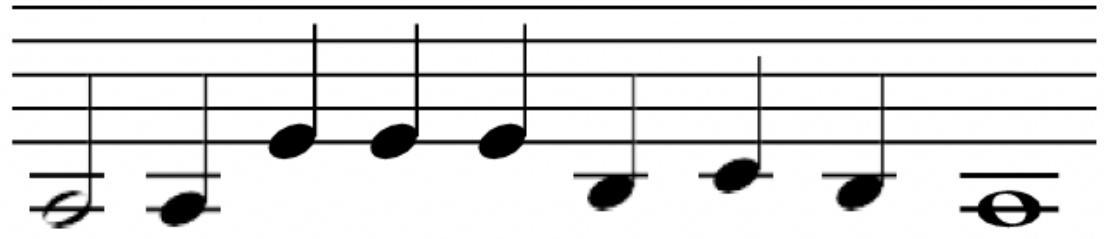





In the simplest case, each note may be represented by a series of samples of a sinusoid followed by a shorter period of silence (samples of zeros, which are a pause).


The pauses allow us to distinguish between separate notes of the same pitch. The duration of each note burst is determined by whether the note is a whole note, a half note, or a quarter note

### Musical Note Durations

<table>
  <tr>
    <td style="font-size: 36px;">𝅝</td>
    <td><strong>Whole note</strong>: lasts 4 counts</td>
  </tr>
  <tr>
    <td style="font-size: 36px;">𝅗𝅥</td>
    <td><strong>Half note</strong>: lasts 2 counts</td>
  </tr>
  <tr>
    <td style="font-size: 36px;">♩</td>
    <td><strong>Quarter note</strong>: lasts 1 count</td>
  </tr>
</table>



We will use $\mathbf{4 , 0 0 0}$ samples for 1 count.











In [3]:
import numpy as np
import IPython.display as ipd
# Usage:
# ipd.Audio(audio_array, rate=sampling_rate, autoplay=True)
import matplotlib.pyplot as plt

In [4]:
# SimpleAudio constants.
DEFAULT_SAMPLE_RATE = 8000
DEFAULT_AMPLITUDE = 1
DEFAULT_BYTES_PER_SAMPLE = 2
DEFAULT_NUM_CHANNELS = 1

# Musical note frequencies.
A = 220.0
B = A * 2 ** (2 / 12)
C = A * 2 ** (3 / 12)
E = A * 2 ** (7 / 12)

In [5]:
def play(data, num_channels=DEFAULT_NUM_CHANNELS, bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE,
         sample_rate=DEFAULT_SAMPLE_RATE):
    """Returns a playable audio object

    Args:
        data: The audio data to be played (as a NumPy array).
        num_channels: The number of audio channels.
        bytes_per_sample: The number of bytes per sample per channel.
        sample_rate: The sample rate.
    """
    # Enter code here

    return ipd.Audio(data, rate=sample_rate, autoplay=True)


def display_envelope(signal,duration=-1,sample_rate=DEFAULT_SAMPLE_RATE,bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE):

    """
    Plots the envelope of a duration of the generated audio.

    Args:
        signal: The audio signal to be displayed (as a NumPy array).
        duration: The length of the signal to be displayed. -1 to display entire signal.
        num_channels: The number of audio channels.
        bytes_per_sample: The number of bytes per sample per channel.
        sample_rate: The sample rate.
    """

    from scipy.signal import hilbert

    if duration < 0:
        duration = len(signal)/sample_rate  # element-wise division by  sample / int(sample / time)

    n = int(duration*sample_rate)  # int (time * (sample / time))

    analytic_signal = hilbert(signal[0:n])  # (?)obtain the positive part of the signal array and double the signal
    amplitude_envelope = np.abs(analytic_signal) # abs the signal

    t = np.linspace(0,duration,len(amplitude_envelope))
    print("The length for our note:",  len(t))

    plt.figure()
    plt.plot(t,amplitude_envelope)
    plt.show()


'''
Workflow
  1. obtain 'duration', default to -1 if not provided and calculate the length of the signal
  2. obtain the sample length
  3. envoloping the signal using hilbert() and abs()
  4. plot based on 'duration' and lenght of the envoloped signal

Function Used
  - hilbert():
      - uses: to filter out the negative freqneucy and doubling the amplitude in the FFT domain; convert back the time domain
      - return: ndarray

'''

"\nWorkflow\n  1. obtain 'duration', default to -1 if not provided and calculate the length of the signal\n  2. obtain the sample length\n  3. envoloping the signal using hilbert() and abs()\n  4. plot based on 'duration' and lenght of the envoloped signal\n\nFunction Used\n  - hilbert():\n      - uses: to filter out the negative freqneucy and doubling the amplitude in the FFT domain; convert back the time domain\n      - return: ndarray\n\n"

In [54]:
# defining note function
def note(frequency, duration, amplitude=DEFAULT_AMPLITUDE, sample_rate=DEFAULT_SAMPLE_RATE):
    """Generates samples of a musical note.

    Samples are generated according to following equation:

        y(t) = A sin(wt)

    Args:
        frequency: The frequency of the note.
        duration: The length of the note in seconds.
        amplitude: The amplitude of the note.
        sample_rate: The sample rate.

    Returns:
        An array of samples representing the note.
    """

    y = amplitude*np.sin(2* np.pi*frequency* np.arange(duration*sample_rate)/sample_rate)
    print("The length of the duration for our note:", len(np.arange(duration*sample_rate)/sample_rate))
    return y

In [86]:

score = [
    (A, 2),  # half note
    (A, 1),  # quarter ntoe
    (E, 1),
    (E, 1),
    (E, 1),
    (B, 1),
    (C, 1),
    (B, 1),
    (A, 4),  # whole note
]

# Building the song
notes = [note(freq, dur) for (freq, dur) in score]
song = np.concatenate(notes)


# Play the audio
display(play(song, sample_rate=DEFAULT_SAMPLE_RATE))
display_envelope(song)

TypeError: 'numpy.ndarray' object is not callable

## Enevopled Signal: Attack, Decay, Sustain, and Release (ADSR)

Goal: to apply envolpe method to smooth signal. ADSR is one of the common evnoploe paradim for one to practice signal control. It takes in 0,1 .

```
A: Linear increase to 60% amplitude over 20% length.
D: Linear decrease to 50% amplitude over 4% length.
S: Constant 50% amplitude over 40% length.
R: Linear decrease to 0% amplitude over 36% length.
```
## Helpful Hints
- You may find the `arange` or `linspace` functions useful for generating the ramping regions of the envelope.


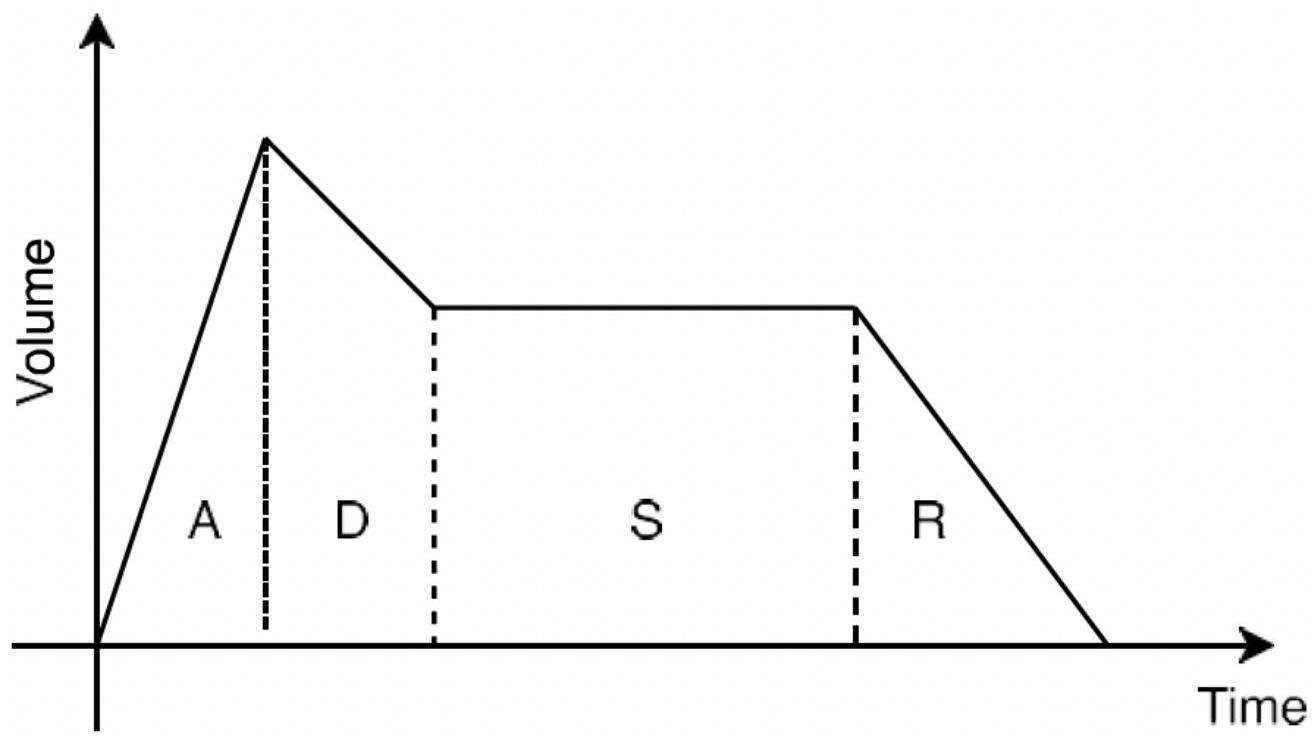


In [56]:
def adsr(note):
    """Generates an ADSR envelope and applies it to a note seqeunce"""

    length = len(note)
    a_len = int(length * 0.20)
    d_len = int(length * 0.04)
    s_len = int(length * 0.40)
    r_len = length - (a_len + d_len + s_len)

    attack = np.linspace(0, 0.6, a_len, endpoint=False) # we use linspace as a weight vector
    decay = np.linspace(0.6, 0.5, d_len, endpoint=False)
    sustain = np.full(s_len, 0.5)
    release = np.linspace(0.5, 0, r_len)

    adsr_env = np.concatenate([attack, decay, sustain, release])
    return adsr_env*note

The length for our note: 104000


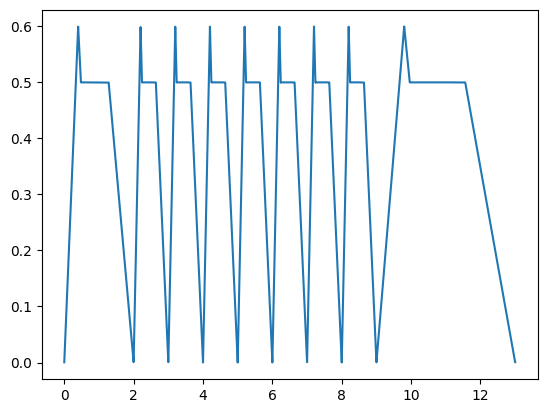

In [93]:

new_notes = []
for note in notes:
    new_notes.append(adsr(note))
new_song = np.concatenate(new_notes)

display(play(new_song, sample_rate=DEFAULT_SAMPLE_RATE))
display_envelope(new_song)

## Task 3: Overlapping Notes
Goal: To further smooth the signal based on DSAR evelop thorugh overlapping the notes

- function: `np.pad` may be helpful.



In [89]:
def overlap(notes, offset):
    sample_offset = int(DEFAULT_SAMPLE_RATE * offset)

    if (len(notes) ==  1):
        return notes[1]
    if (len(notes) ==  0):
        return notes[0]

    out = [0]
    for note in notes[1:]:
        sample_offset = min(len(note), sample_offset)

        out[-sample_offset:] += note[0:sample_offset]
        out = np.concatenate((out, note[sample_offset:]))
    out /= np.max(np.abs(out))
    return out

The length for our note: 76800


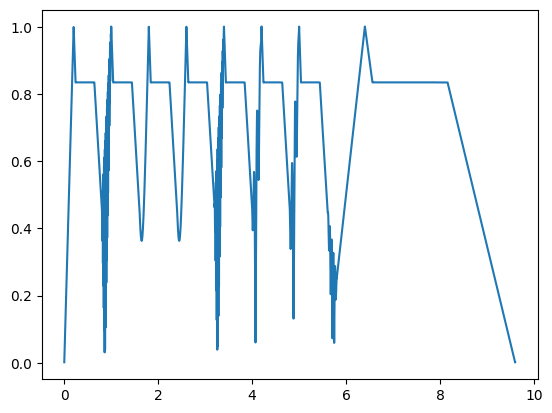

In [92]:

overlapped_score = overlap(new_notes, 0.2)

audio3 = play(overlapped_score)
display(audio3)

display_envelope(overlapped_score)